# Alexandria Curso Basico

## Cargar datos
A continuacion se pueden visualizar multiples formas de cargars datos para su posterior procesamiento. Dentro del entorno python la libreria mas utilizada para este prorposito es pandas.

Esta herramienta nos permite cargar datos de diferentes tipos de fuentes de datos, los mismos pueden ser CSV, TSV, Sql, Bases de datos tradicionales, JSON, HTML, Haddop, SAS, Big query, Stata entre otros

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df = pd.read_csv('./titanic.csv',index_col='PassengerId')

In [5]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Analisis exploratorio de los datos

In [6]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11174b048>,
      dtype=object)

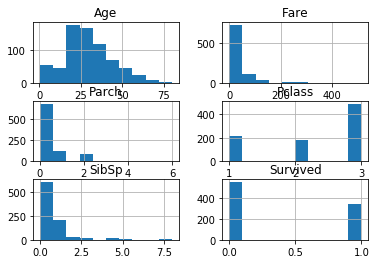

In [8]:
df.hist()

In [9]:
profile = pandas_profiling.ProfileReport(df)
profile.to_file(outputfile="analisisUnivariado.html")

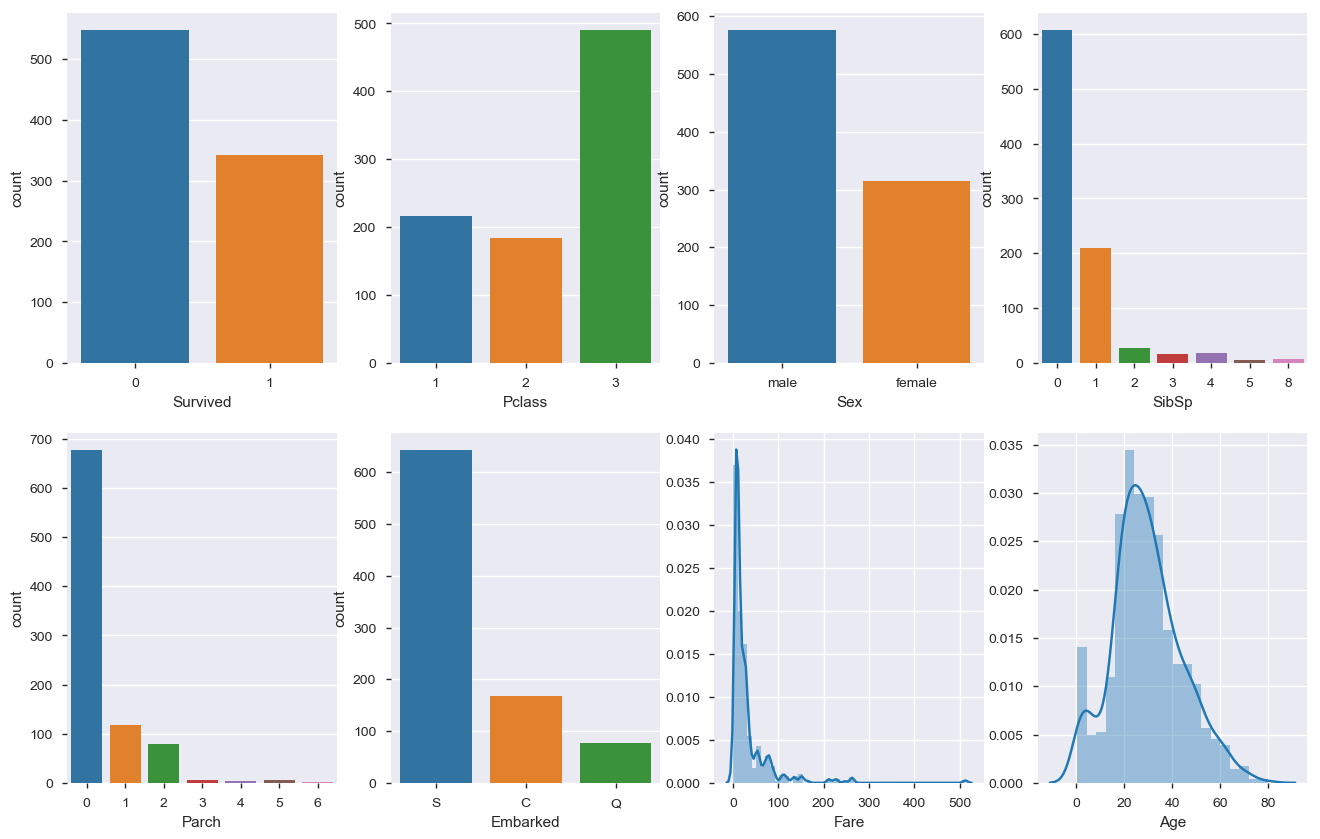

In [10]:
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
sns.countplot('Survived',data=df,ax=axes[0,0])
sns.countplot('Pclass',data=df,ax=axes[0,1])
sns.countplot('Sex',data=df,ax=axes[0,2])
sns.countplot('SibSp',data=df,ax=axes[0,3])
sns.countplot('Parch',data=df,ax=axes[1,0])
sns.countplot('Embarked',data=df,ax=axes[1,1])
sns.distplot(df['Fare'], kde=True,ax=axes[1,2])
sns.distplot(df['Age'].dropna(),kde=True,ax=axes[1,3])

### Distribucion del target

In [11]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [12]:
df.groupby("Survived").mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


### Relacion sobrevivientes con categoria

In [13]:
df.groupby("Pclass").Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [14]:
pd.crosstab(df.Pclass, df.Survived)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [15]:
pd.crosstab(df.Pclass, df.Survived).apply(lambda x: x/x.sum(), axis=1)

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


### Relacion sobrevivientes con categoria y sexo

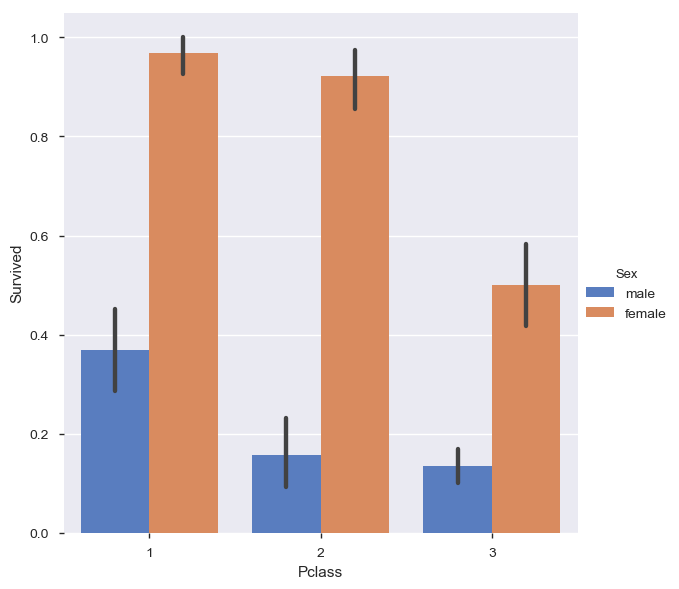

In [16]:
sns.catplot(x="Pclass", y="Survived", hue="Sex", data=df,height=6, kind="bar", palette="muted")

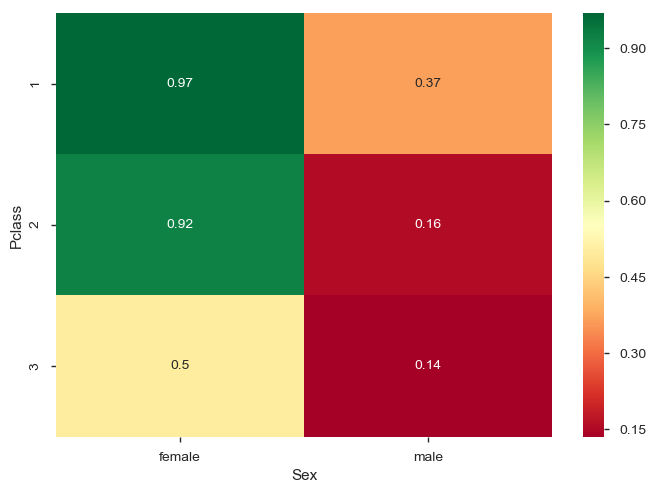

In [17]:
agrupado = pd.crosstab(df.Pclass, df.Sex,values=df.Survived, aggfunc=np.mean)
sns.heatmap(agrupado,annot=True, cmap='RdYlGn')

### Relacion sobrevivientes con categoria y edad

In [18]:
# Distribucion sobrevivientes por edad y por clase
agrupado = pd.crosstab(df.Pclass, pd.cut(df.Age, [i * 10 for i in range(9)]),values=df.Survived, aggfunc=np.mean)

In [19]:
agrupado

Age,nan,"(0, 10]","(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]"
Pclass,,,,,,,,
1,0.725000,0.567568,0.600000,0.666667,0.833333,0.333333,0.755102,0.181818
2,0.409836,0.526316,0.166667,1.000000,0.500000,NaN,0.441860,0.333333
3,0.232558,0.066667,0.000000,0.431818,0.253165,0.000000,0.206349,0.333333


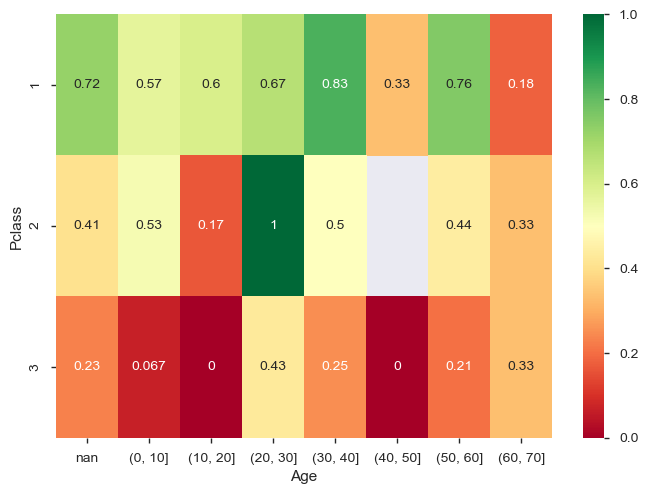

In [20]:
sns.heatmap(agrupado,annot=True,cmap='RdYlGn')